In [2]:
import pandas as pd

df1 = pd.read_csv("0112.csv", encoding="utf-8")
df2 = pd.read_csv("0113.csv", encoding="utf-8")
df3 = pd.read_csv("0114.csv", encoding="utf-8")
df4 = pd.read_csv("0115.csv", encoding="utf-8")
df5 = pd.read_csv("0116.csv", encoding="utf-8")
df6 = pd.read_csv("0117.csv", encoding="utf-8")
df7 = pd.read_csv("0118.csv", encoding="utf-8")
df8 = pd.read_csv("0119.csv", encoding="utf-8")
df9 = pd.read_csv("0120.csv", encoding="utf-8")
df10 = pd.read_csv("0121.csv", encoding="utf-8")
df11 = pd.read_csv("0122.csv", encoding="utf-8")
df12 = pd.read_csv("0123.csv", encoding="utf-8")
df13 = pd.read_csv("0124.csv", encoding="utf-8")
df14 = pd.read_csv("0125.csv", encoding="utf-8")
df15 = pd.read_csv("0126.csv", encoding="utf-8")

In [3]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15], axis=0, ignore_index = True)
df.shape

(48109, 2)

In [4]:
# 결측치 제거
df = df.dropna(axis = 0)
df.shape

(47497, 2)

In [5]:
# 데이터 중복 유무 확인
df['sentence'].nunique(), df['score'].nunique()

# 중복 제거
df.drop_duplicates(subset=['sentence'], inplace=True)
print('총 샘플 수 :',len(df))

총 샘플 수 : 46668


<AxesSubplot:>

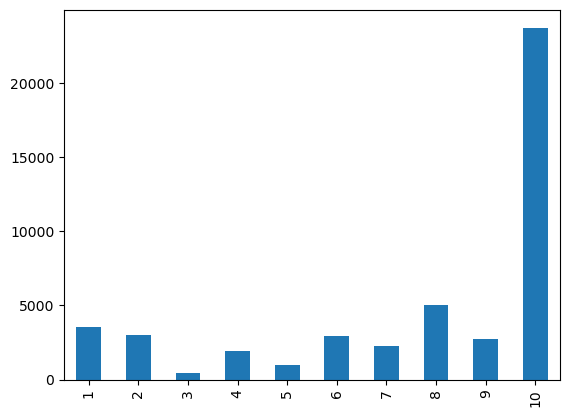

In [6]:
# 데이터 분포 확인
df['score'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [61]:
def rating_to_label(score):
    if score >= 8:
        return 1
    if score <= 4:
        return 0
    
df['y'] = df['score'].apply(lambda x: rating_to_label(x))

In [62]:
df = df.dropna(axis=0).reset_index(inplace=False, drop=True) 
df.shape

(40452, 3)

In [63]:
df["y"].value_counts()

1    31558
0     8894
Name: y, dtype: int64

In [67]:
df2 = df[df["y"]==1].head(8894)
df2.head()

,sentence,score,y
0,"연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움",9,1
2,나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...,8,1
3,넷플로시청하기에 10점~배우분들 매력 최고,10,1
5,너무 재밌어요 크리스마스때 그냥 개봉하시지 ㅠㅅㅠ 흥했으면 좋겠습니다,10,1
6,눈물이 살짝 없는 편이라 걱정했었는데 너무 슬펐다 후반부에 급발진이 심해서 놀라움 ...,10,1


In [69]:
df3 = df[df["y"]==0]
df3.head()

,sentence,score,y
1,큐브가 훨씬 재미있었던 것 같다,4,0
4,이걸 영화라고....,1,0
11,절대 보지 마세요.완전 지루하고 노잼입니다.평점이 도저히 이해가 안갑니다.돈이 너무...,1,0
13,그렇게 no japan 하고싶냐?,1,0
19,뛰는 놈 위에 나는 놈 그 위에 보는 놈,4,0


In [70]:
data = pd.concat([df2,df3], axis=0, ignore_index=True)
data.shape

(17788, 3)

In [71]:
data['score'].value_counts().sort_index(ascending=True)

1     3523
2     3032
3      444
4     1895
8     1256
9      847
10    6791
Name: score, dtype: int64

<AxesSubplot:>

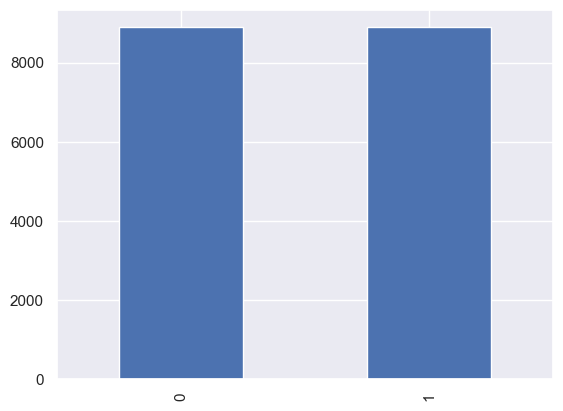

In [72]:
data['y'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [73]:
# 패키지 설치
import pandas as pd
#warning 메시지 표시 안함
import warnings
warnings.filterwarnings(action = 'ignore')

# Train 데이터 불러오기
train_df = data

# 데이터 확인
print(train_df.head())

                                            sentence  score  y
0                      연기는 뭐 말할 것도 없는데, 정제된 연출이 경이로움      9  1
1  나름 재미있게 감상했음...진정한 사랑이란걸 제대로 모르던 챠밍 왕자가 진정한 사랑...      8  1
2                            넷플로시청하기에 10점~배우분들 매력 최고     10  1
3            너무 재밌어요 크리스마스때 그냥 개봉하시지 ㅠㅅㅠ 흥했으면 좋겠습니다      10  1
4  눈물이 살짝 없는 편이라 걱정했었는데 너무 슬펐다 후반부에 급발진이 심해서 놀라움 ...     10  1


In [74]:
text = train_df['sentence']
score = train_df['y']

In [163]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(text, score , test_size=0.2, random_state=0)
print(len(train_x), len(train_y), len(test_x), len(test_y))

14230 14230 3558 3558


In [175]:
train = pd.concat([train_x, train_y], axis=1).reset_index(inplace=False, drop=True) 
train.head()

,sentence,y
0,인간은 원래 사악하지않다. 인간은 사랑스럽고 선한존재이며 착하기까지하다. 그중에 사...,1
1,처음 영화시작하면서 실화를 바탕으로 한 내용이라는 문구보고 아차! 했다아 그얘기구나...,0
2,"발연기, 발연출, 발스토리...",0
3,방금 관람했습니다 산왕전을 애니로볼수있는거자체가 정말 감동이네요 더빙으로봤는데 잼나...,1
4,기대이상의 개꿀잼 ㅋㅋ 이거 꼭봐라 아저씨들,1


In [165]:
test = pd.concat([test_x, test_y], axis=1).reset_index(inplace=False, drop=True) 
test.head()

,sentence,y
0,오랜만에 가슴이 두근두근,1
1,주연 배우들의 연기 매우 어색하네요. 오히려 조연들이 더 자연스럽습니다.,0
2,어머니가 강수연팬이고 유작이라고 해서 보여줬는데 역대급 똥이네,0
3,"전작에 비해 스토리(=악역이 너무 어이없이 사망, 말안듣는 아이들, 가출한 아이를 ...",0
4,"핵노잼.2시간과 돈, 기부할 생각으로 제발 보셈.다음편 제목은 &amp;#39;협상...",0


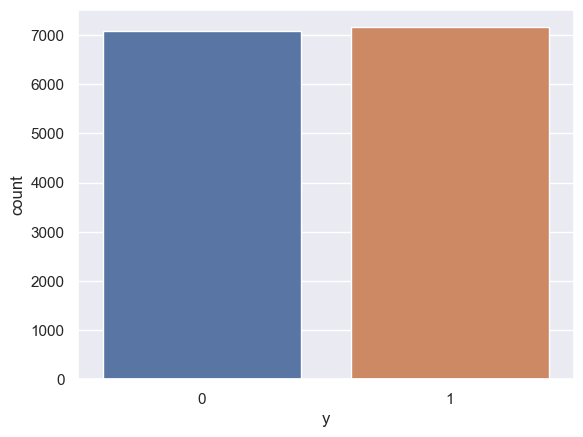

In [166]:
import seaborn as sns

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="y", data=train)

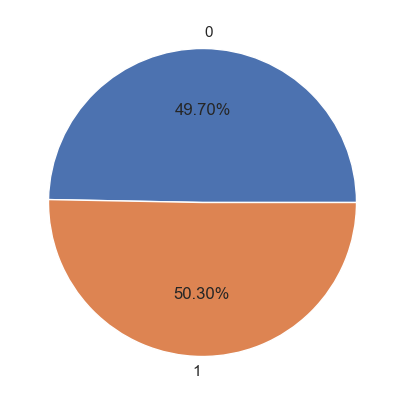

In [167]:
import numpy as np
import matplotlib.pyplot as plt

y, frequencies = np.unique(train.y.values, return_counts=True)
plt.figure(figsize=(5,5))
plt.pie(frequencies, labels = y, autopct= '%1.2f%%')
plt.show()

## 전처리

In [168]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [169]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [170]:
# 전체 텍스트 전처리
stop_words = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
okt = Okt()
clean_train_review = []

In [171]:
from tqdm import tqdm

for review in tqdm(train['sentence']):
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

100%|███████████████████████████████████████████████████████████████████████████| 14230/14230 [02:13<00:00, 106.58it/s]


[['인간',
  '은',
  '원래',
  '사악하다',
  '않다',
  '인간',
  '은',
  '사랑스럽다',
  '선하다',
  '존재',
  '이며',
  '착하다',
  '하다',
  '그',
  '중',
  '에',
  '사악하다',
  '인간',
  '들',
  '이',
  '조금',
  '있다',
  '뿐이다',
  '영화',
  '는',
  '인간',
  '의',
  '사랑',
  '이',
  '얼마나',
  '순수하다',
  '잘',
  '보여주다',
  '행복하다',
  '마음',
  '도',
  '머리',
  '도',
  '내',
  '옆',
  '에',
  '있다',
  '내',
  '아내',
  '와',
  '나',
  '의',
  '딸',
  '을',
  '원',
  '없이',
  '평생',
  '더',
  '사랑',
  '하고',
  '아끼다'],
 ['처음',
  '영화',
  '시작',
  '하다',
  '실화',
  '를',
  '바탕',
  '으로',
  '하다',
  '내용',
  '이라는',
  '문구',
  '보고',
  '아차',
  '하다',
  '그',
  '얘기',
  '구나',
  '나가다',
  '말다',
  '하다',
  '번',
  '고민',
  '한',
  '듯'],
 ['발연기', '발', '연출', '발', '스토리'],
 ['방금',
  '관람',
  '하다',
  '산',
  '왕전',
  '을',
  '애니',
  '로',
  '보다',
  '자체',
  '가',
  '정말',
  '감동',
  '이네',
  '요',
  '더빙',
  '으로',
  '보다',
  '재다',
  '보다',
  '만화책',
  '에서와는',
  '다른',
  '전체',
  '적',
  '인',
  '농구',
  '경',
  '기보',
  '는',
  '듯',
  '한',
  '재미',
  '도',
  '있다',
  '역시',
  '마지막',
  '장면',
  '알',
  '고',
  '보다',
  '두근거리다

In [30]:
#테스트 리뷰도 동일하게 전처리
clean_test_review = []
for review in tqdm(test['sentence']):
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])

100%|█████████████████████████████████████████████████████████████████████████████| 3558/3558 [00:28<00:00, 124.11it/s]


## 문자로 되어있는 리뷰데이터를 인덱스 벡터로 변환

In [186]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train['y'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test['y'])

In [187]:
train_inputs.shape

(14230, 8)

In [188]:
train_labels.shape

(14230,)

## 전처리 완료된 데이터 넘파이 파일로 저장

In [190]:
DEFAULT_PATH  = '/content/sample_data2/' # 경로지정
DATA_PATH = 'CLEAN_DATA/' #.npy파일 저장 경로지정
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

## 학습데이터 및 전처리 데이터 불러오기

In [191]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

#전처리 데이터 불러오기
DATA_PATH = '/content/sample_data2/CLEAN_DATA/'
DATA_OUT = '/content/sample_data2/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

## 파라미터 세팅하기

In [192]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

## 모델 함수 만들기

In [193]:
class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))
    

  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

## 학습하기

In [194]:
from tensorflow.keras.models import save_model

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name +'\weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])
# 모델 저장하기
save_model(model,'C:/Users/user/model')

/content/sample_data2/DATA_OUT/cnn_classifier_kr -- Folder already exists 

Epoch 1/10
25/26 [===========================>..] - ETA: 0s - loss: 0.6603 - accuracy: 0.6165
Epoch 1: val_accuracy improved from -inf to 0.73717, saving model to /content/sample_data2/DATA_OUT/cnn_classifier_kr\weights.h5
26/26 [==============================] - 4s 62ms/step - loss: 0.6601 - accuracy: 0.6167 - val_loss: 0.5521 - val_accuracy: 0.7372
Epoch 2/10
26/26 [==============================] - ETA: 0s - loss: 0.4339 - accuracy: 0.8029
Epoch 2: val_accuracy improved from 0.73717 to 0.80253, saving model to /content/sample_data2/DATA_OUT/cnn_classifier_kr\weights.h5
26/26 [==============================] - 1s 47ms/step - loss: 0.4339 - accuracy: 0.8029 - val_loss: 0.4252 - val_accuracy: 0.8025
Epoch 3/10
26/26 [==============================] - ETA: 0s - loss: 0.3054 - accuracy: 0.8739
Epoch 3: val_accuracy improved from 0.80253 to 0.80464, saving model to /content/sample_data2/DATA_OUT/cnn_classifier_kr\

INFO:tensorflow:Assets written to: C:/Users/user/model\assets


INFO:tensorflow:Assets written to: C:/Users/user/model\assets


In [195]:
model.fit(train_input, train_label)

445/445 [==============================] - 9s 21ms/step - loss: 0.2320 - accuracy: 0.9051


## 평가하기

In [198]:
test_input.shape

(3558, 8)

In [199]:
test_label_data.shape

(3558,)

In [200]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights('C:/content/sample_data2/DATA_OUT/cnn_classifier_kr/weights.h5')
model.evaluate(test_input, test_label_data)

112/112 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8280


[0.4361574947834015, 0.8279932737350464]

## 예측하기

In [205]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('/content/sample_data/CLEAN_DATA/'+DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

model.load_weights('/content/sample_data2/DATA_OUT/cnn_classifier_kr/weights.h5') #모델 불러오기
predictions = model.predict(pad_new)
predictions = float(predictions.squeeze(-1)[1])

if(predictions > 0.5):
  print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(predictions * 100))
else:
  print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - predictions) * 100))

감성분석할 문장을 입력해 주세요.:  다음에 또 보고싶은 영화


1/1 [==============================] - 0s 75ms/step
50.46% 확률로 긍정 리뷰입니다.

